In [14]:
import pandas as pd

city_name = input("What is the City?")
input_file = city_name+'/Raw/historical_daily_raw.csv'

#Import raw file
df = pd.read_csv(input_file)
print(len(df.index))

FileNotFoundError: [Errno 2] No such file or directory: '/Raw/historical_daily_raw.csv'

     datetime   tempmin  moving_avg
0  1980-12-31  1.388889         NaN
1  1981-12-31  3.833333         NaN
2  1982-12-31  2.166667    2.462963
3  1983-12-31  2.722222    2.907407
4  1984-12-31  2.166667    2.351852
5  1985-12-31  1.666667    2.185185
6  1986-12-31  4.000000    2.611111
7  1987-12-31  1.777778    2.481481
8  1988-12-31  1.388889    2.388889
9  1989-12-31 -0.500000    0.888889
10 1990-12-31 -3.333333   -0.814815
11 1991-12-31  1.666667   -0.722222
12 1992-12-31  2.000000    0.111111
13 1993-12-31  1.166667    1.611111
14 1994-12-31  2.388889    1.851852
15 1995-12-31  3.833333    2.462963
16 1996-12-31  2.722222    2.981481
17 1997-12-31  0.111111    2.222222
18 1998-12-31  0.055556    0.962963
19 1999-12-31  2.166667    0.777778


/var/folders/2m/s5dls335695361g_hk_1ckb80000gn/T/ipykernel_14627/953268529.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_temp_df['datetime'] = pd.to_datetime(max_temp_df['datetime'])


<Axes: xlabel='datetime'>

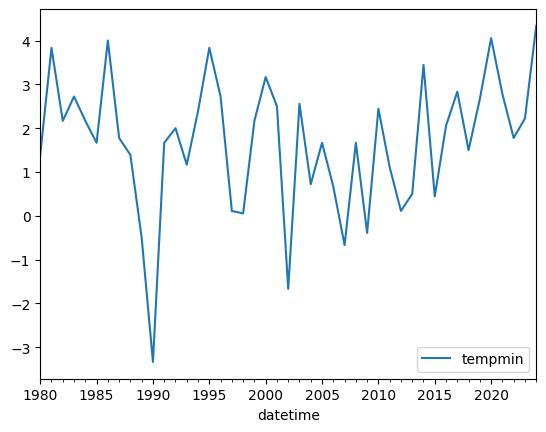

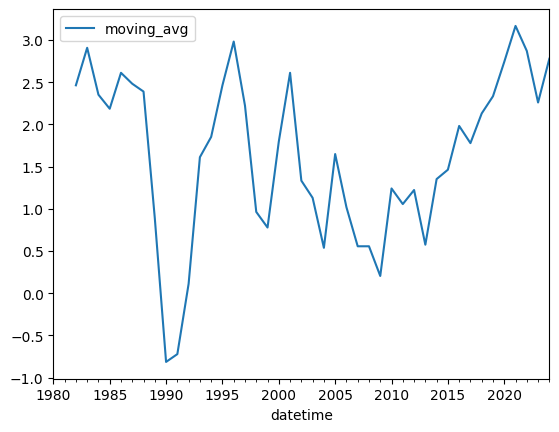

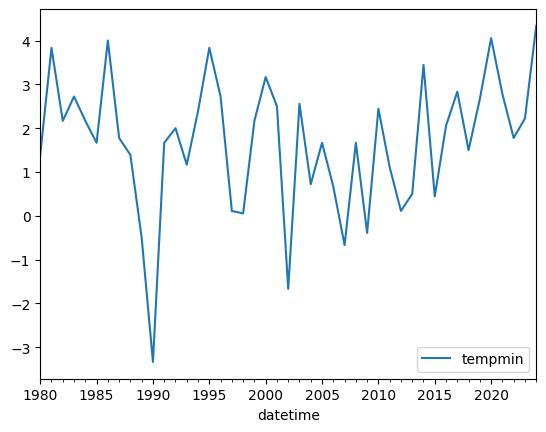

In [ ]:
data_value = 'tempmin'
frequency = 'monthly'
max_temp_df = df[['datetime',data_value]]
max_temp_df['datetime'] = pd.to_datetime(max_temp_df['datetime'])
max_temp_df = max_temp_df.groupby([pd.Grouper(key='datetime', freq='1YE')], as_index=False).min()

# Group based on frequency
# if(frequency == 'monthly'):
#     max_temp_df = max_temp_df.groupby([pd.Grouper(key='datetime', freq='1M')]).max()
# elif(frequency == 'weekly'):
#     max_temp_df = max_temp_df.groupby([pd.Grouper(key='datetime', freq='1W')]).max()
# else:
#     max_temp_df = max_temp_df.groupby([pd.Grouper(key='datetime', freq='1D')]).max()

#convert farenheit to celsius
max_temp_df[data_value] = max_temp_df[data_value].map(lambda a: (a-32) * 5/9)

# Calculate moving average for maxtemp
max_temp_df.plot(x='datetime', y=data_value) 

max_temp_df['moving_avg'] = max_temp_df[data_value].rolling(3).mean()
print(max_temp_df.head(20))

max_temp_df.plot.line(x='datetime', y='moving_avg') 
max_temp_df.plot.line(x='datetime', y='tempmin') 


In [ ]:

# if(type == 'json'):
#     max_temp_df.to_json(output_location+'.json', orient='table')
# elif(type == 'csv'):
#     max_temp_df.to_csv(output_location+'.csv')
# elif(type == 'both'):
#     max_temp_df.to_json(output_location+'.json', orient='table')
#     max_temp_df.to_csv(output_location+'.csv')